In [1]:
import os
import pandas as pd
import numpy as np
import glob

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%config InlineBackend.figure_formatrmat = 'retina'

In [2]:
from stesml.data_tools import get_train_and_test_index
from stesml.data_tools import load_data
from stesml.data_tools import series_to_supervised
from stesml.data_tools import get_train_data
from stesml.data_tools import get_test_data

from stesml.model_tools import get_model
from stesml.model_tools import walk_forward_validation
from stesml.model_tools import get_predictions
from stesml.model_tools import get_progress
from stesml.model_tools import get_shuffle_results
from stesml.model_tools import get_T_from_h_results

from stesml.plot_tools import get_plot_data
from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error
from stesml.plot_tools import plot_progress_results

from stesml.postprocessing_tools import get_Cp
from stesml.postprocessing_tools import get_Ac
from stesml.postprocessing_tools import get_m
from stesml.postprocessing_tools import get_As
from stesml.postprocessing_tools import get_h
from stesml.postprocessing_tools import get_T

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data_dir = "../data/Sulfur_Models_update/"

scenario_index = pd.DataFrame({"filepath": glob.glob(os.path.join(data_dir, "ML_*_*.csv"))})

In [17]:
model_type = "XGBoost"
is_recurrent = False
n_estimators = 300
target = 'Tavg'
per_case = False
x = 0
random_state = 5

In [18]:
train_index, test_index = get_train_and_test_index(scenario_index, random_state)

X_train, y_train = get_train_data(scenario_index, train_index, test_index, is_recurrent, target=target, per_case=per_case, x=x)
X_test, y_test = get_test_data(scenario_index, test_index, is_recurrent, target=target, x=x)

In [19]:
model = get_model(model_type, n_estimators)

In [20]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.75,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
y_hat = get_predictions(model, X_test, is_recurrent)

In [22]:
print(r2_score(y_test, y_hat))

0.9486817474461038


In [23]:
print(mean_squared_error(y_test, y_hat, squared=False))

12.001698956511996


In [24]:
test_df = load_data(scenario_index, test_index, x=x)

In [25]:
test_df[target+"_hat"] = y_hat

In [26]:
test_df_plot = get_plot_data(y_hat, test_df, test_index, is_recurrent, target=target)

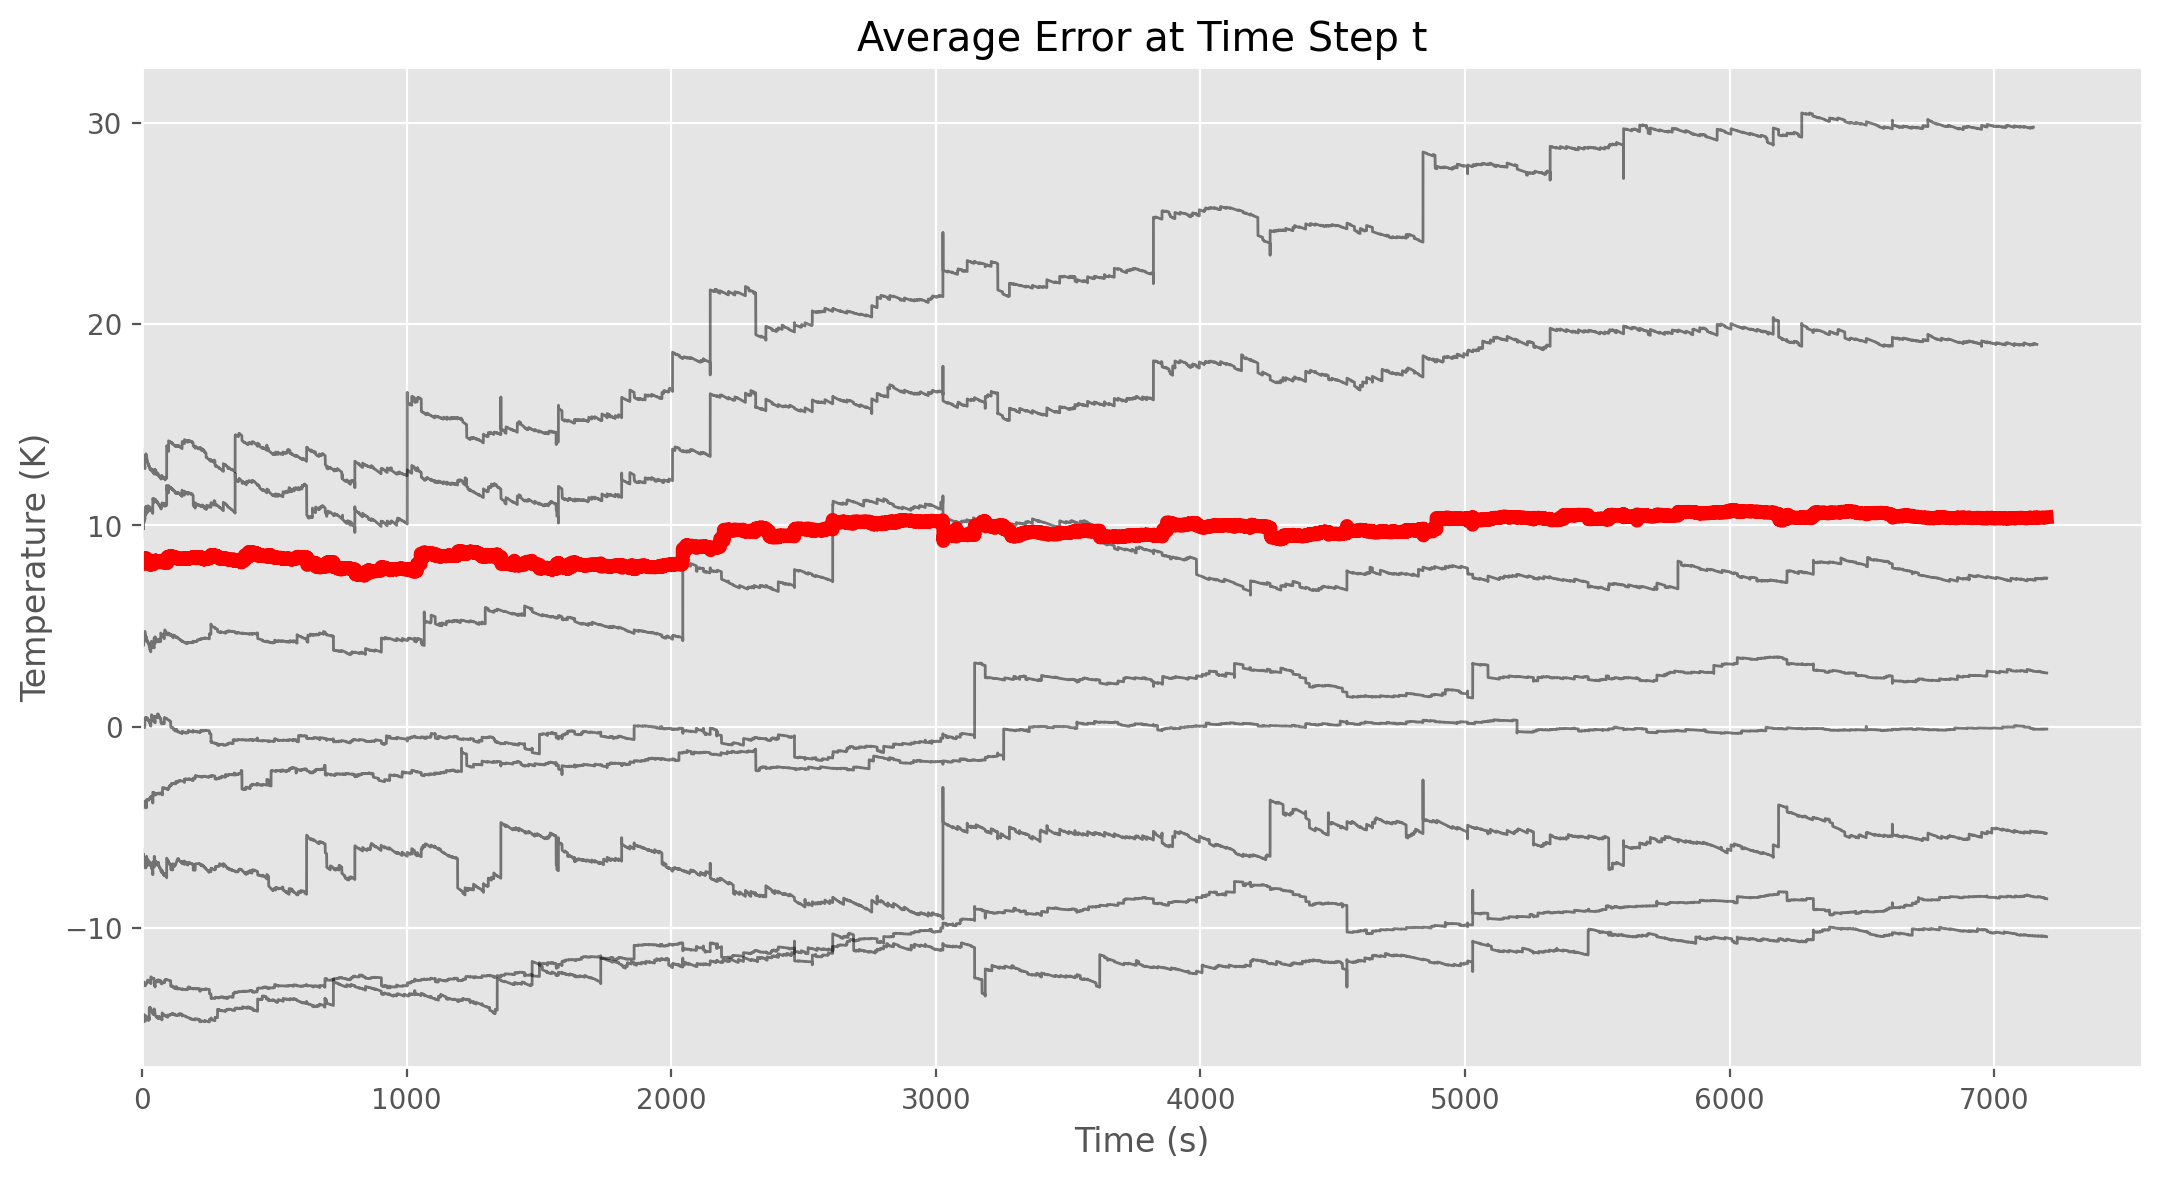

0         8.150928
1         8.150906
2         8.150883
3         8.150845
4         8.150771
           ...    
71995    10.396309
71996    10.396247
71997    10.401732
71998    10.401671
71999    10.401610
Length: 72000, dtype: float64

In [27]:
plot_average_error(test_df_plot, target=target)

<AxesSubplot:>

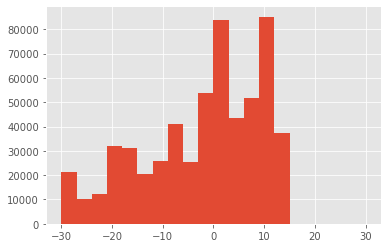

In [28]:
(test_df_plot[target] - test_df_plot[target+'_hat']).hist(bins=20, range=(-30, 30))

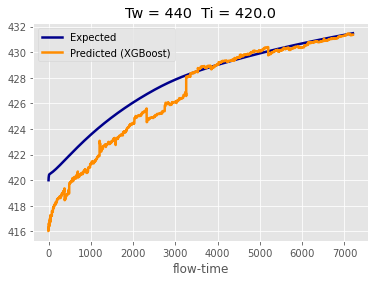

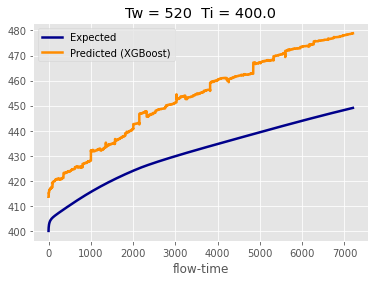

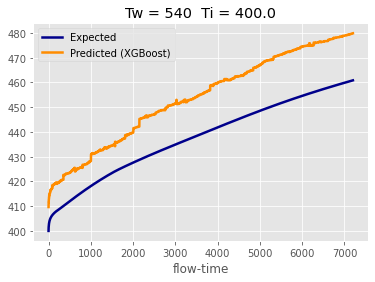

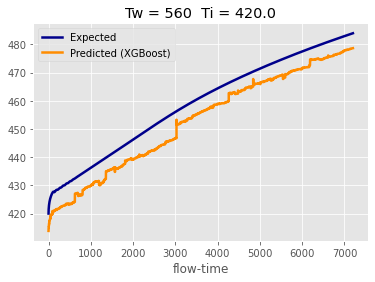

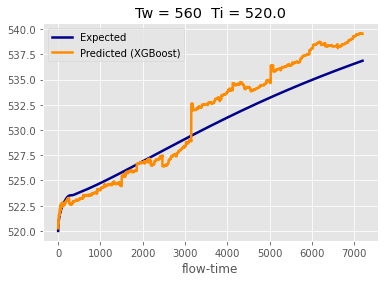

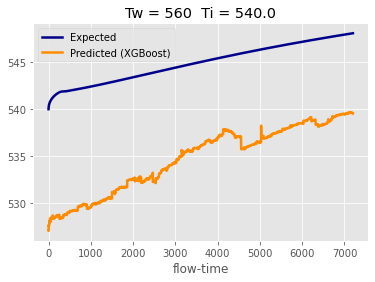

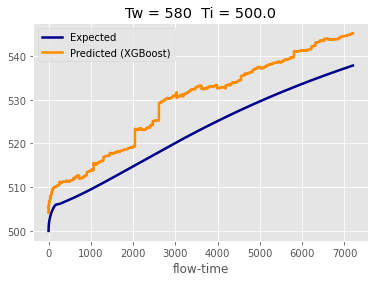

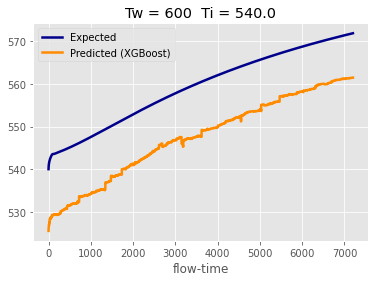

In [29]:
plot_test_results(test_df_plot, model_type, target=target)

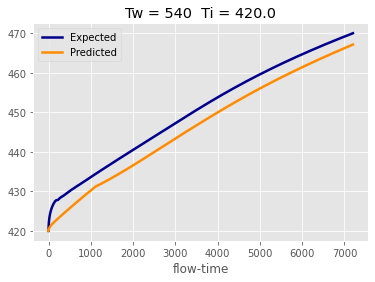

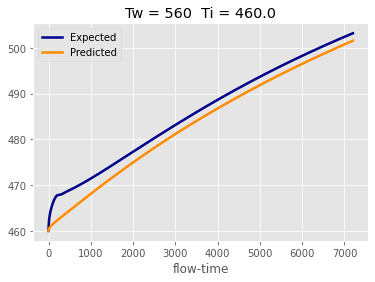

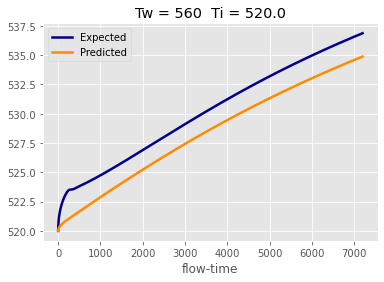

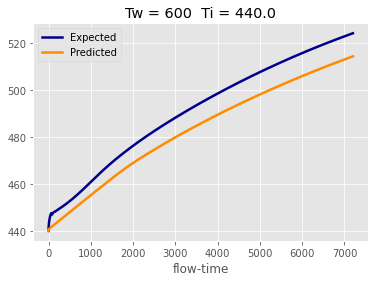

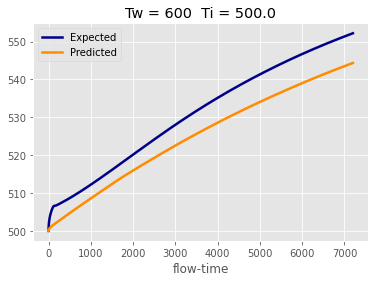

In [17]:
if target == 'h':
    rmse_T, r2_T = get_T_from_h_results(test_df, plot=True)

In [18]:
print(r2_T)

0.9768038256593253


In [19]:
print(rmse_T)

5.106319998340688


In [5]:
model_type = "XGBoost"
is_recurrent = False
target = 'Tavg'
per_case = False
x = 0

min_estimators = 100
max_estimators = 1000
step_size = 100
n_shuffle_iterations = 20

rmse_history, r2_history = get_progress(model_type, scenario_index, min_estimators, max_estimators, step_size, n_shuffle_iterations, is_recurrent, verbose=1, target=target, per_case=per_case, x=x)

Estimators: 100 Shuffle: 0 RMSE: 12.160723625929567 R2: 0.945041491463394
Estimators: 100 Shuffle: 1 RMSE: 10.737816079473408 R2: 0.9164462202071451
Estimators: 100 Shuffle: 2 RMSE: 10.18657588046308 R2: 0.926035848043426
Estimators: 100 Shuffle: 3 RMSE: 10.763187555791177 R2: 0.9008206508821999
Estimators: 100 Shuffle: 4 RMSE: 10.829881920718845 R2: 0.9022669006647751
Estimators: 100 Shuffle: 5 RMSE: 10.791686814743843 R2: 0.9096366294326431
Estimators: 100 Shuffle: 6 RMSE: 10.753734224036988 R2: 0.9145842150082016
Estimators: 100 Shuffle: 7 RMSE: 11.367316127426747 R2: 0.8915613947573552
Estimators: 100 Shuffle: 8 RMSE: 11.652609748436435 R2: 0.8908814747461018
Estimators: 100 Shuffle: 9 RMSE: 11.231159938503898 R2: 0.8950921441094613
Estimators: 100 Shuffle: 10 RMSE: 10.980706350446098 R2: 0.9021037158945304
Estimators: 100 Shuffle: 11 RMSE: 11.418684619705049 R2: 0.8979781740739682
Estimators: 100 Shuffle: 12 RMSE: 11.662522254878208 R2: 0.8802025742689422
Estimators: 100 Shuffle: 


KeyboardInterrupt



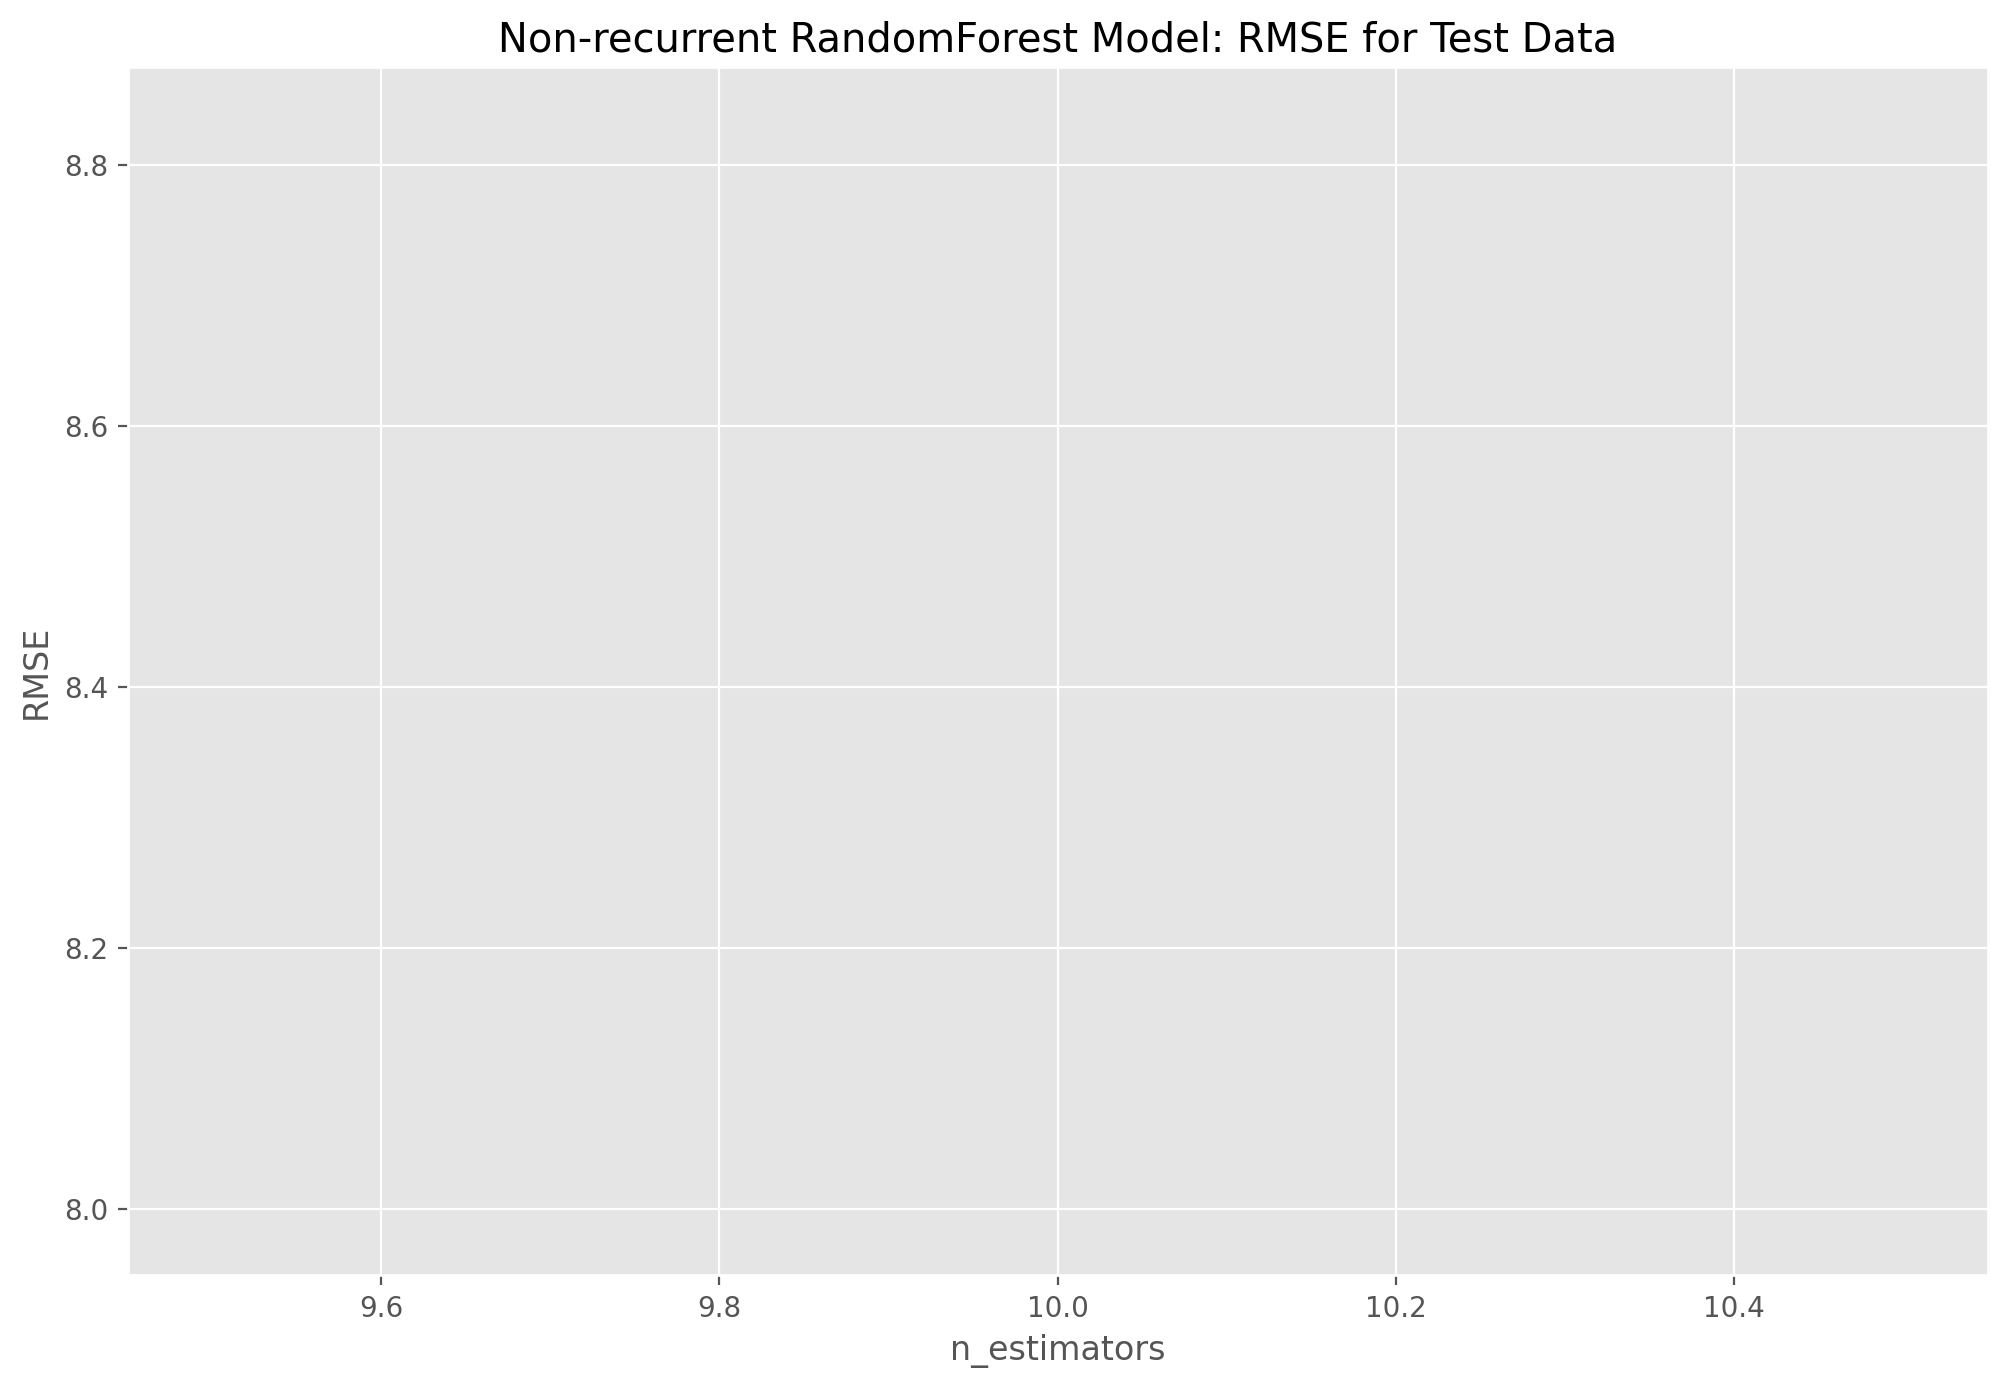

In [24]:
plot_progress_results(rmse_history, model_type, is_recurrent, metric="RMSE")

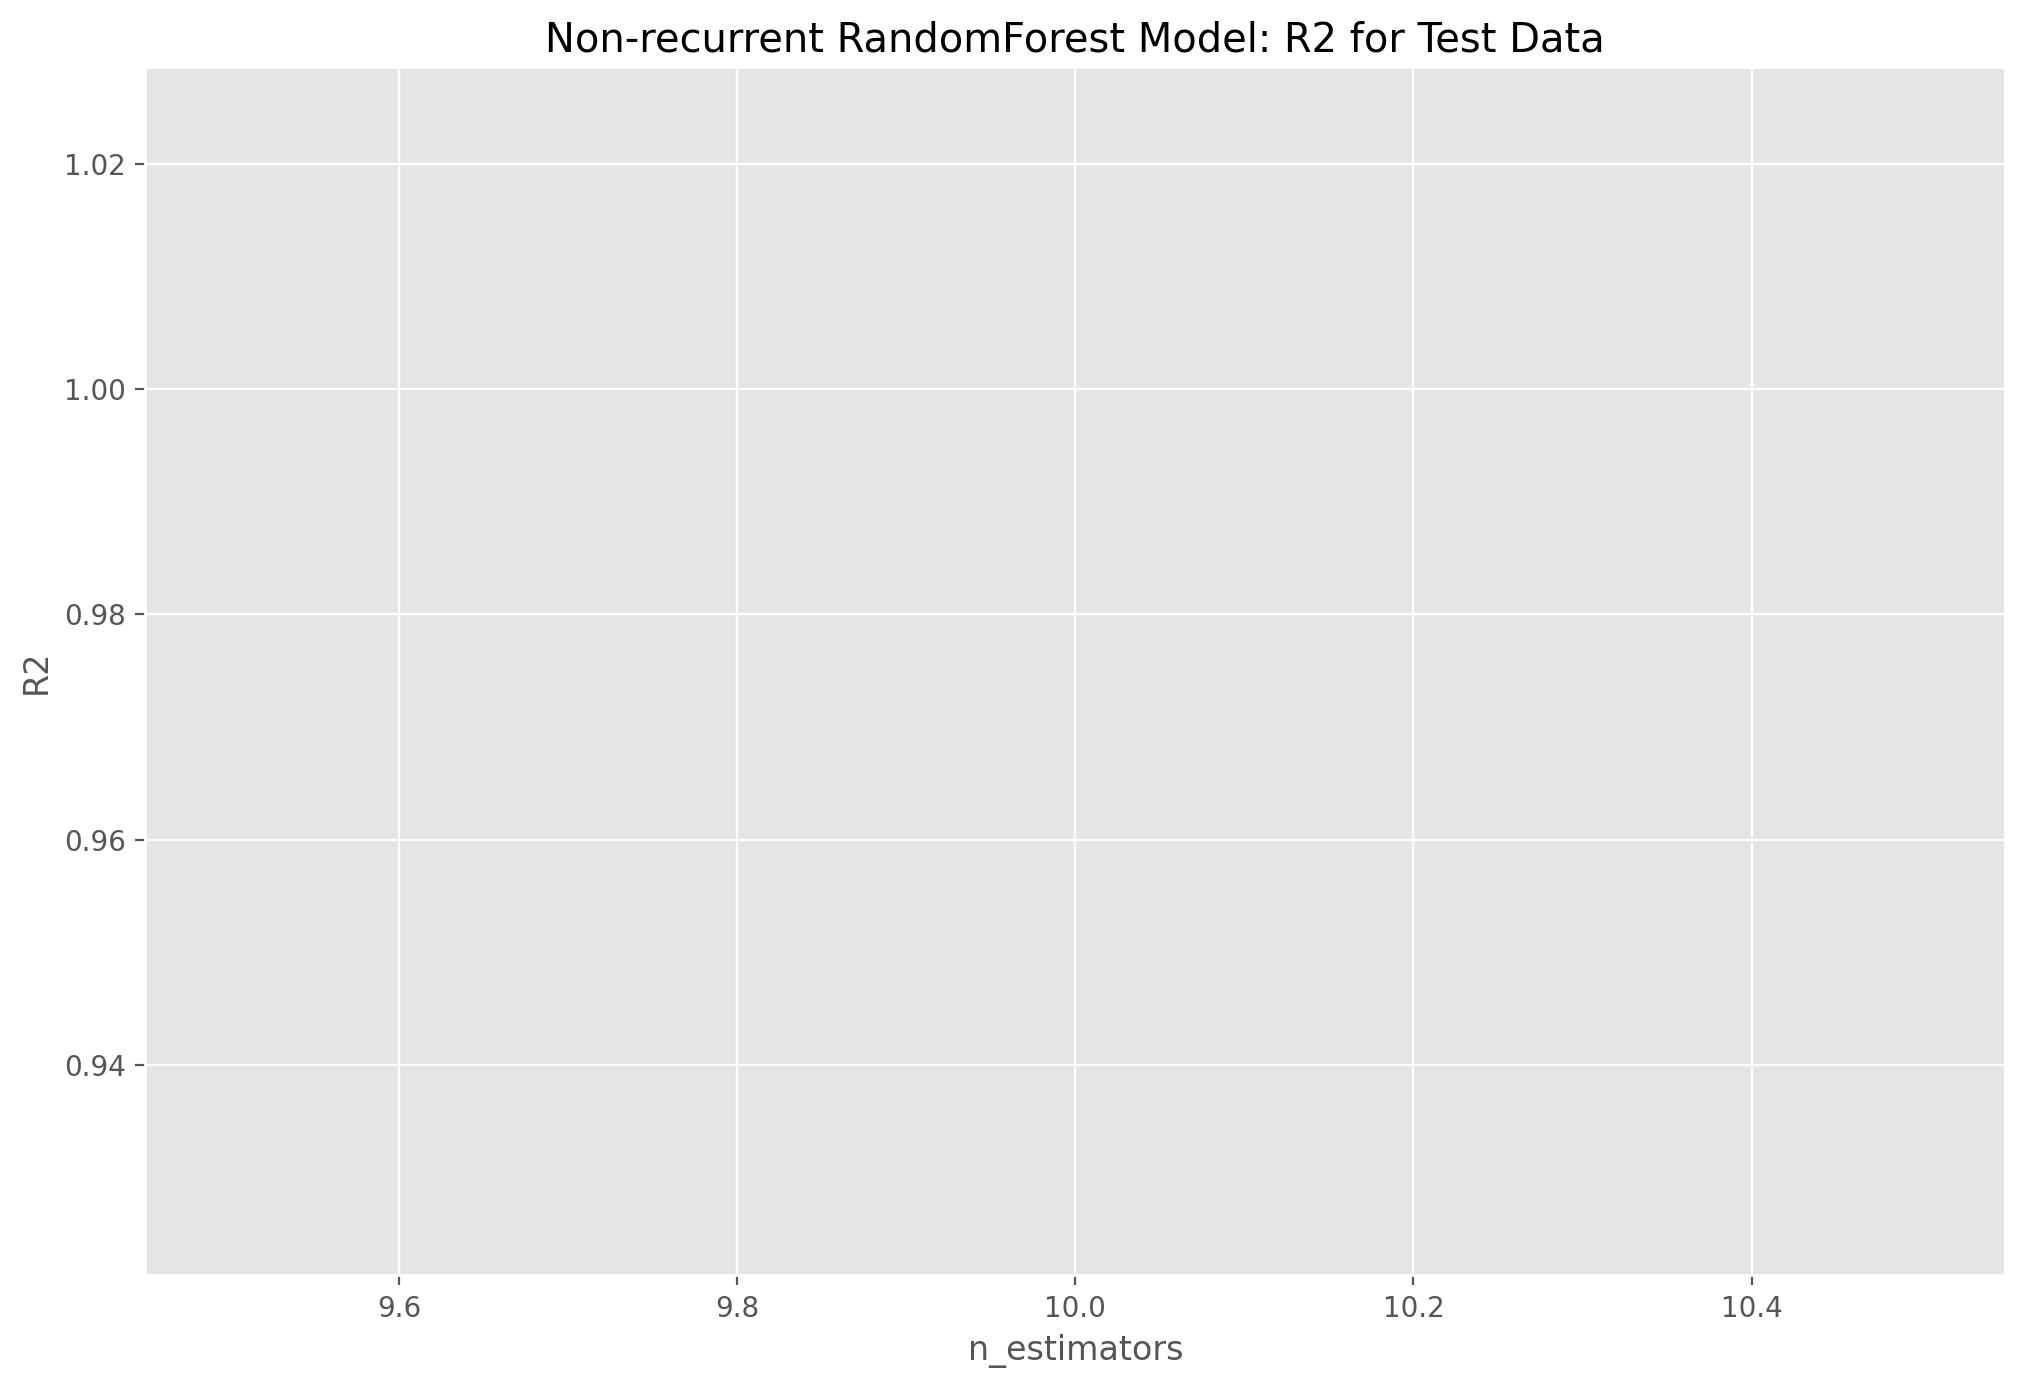

In [25]:
plot_progress_results(r2_history, model_type, is_recurrent, metric="R2")

In [30]:
model_type = 'XGBoost'
is_recurrent = False
target = 'h'
n_estimators = 300
n_shuffle_iterations = 10
per_case = False
x = 0

rmse_history, r2_history = get_shuffle_results(model_type, scenario_index, n_estimators, n_shuffle_iterations, is_recurrent, verbose=1, target=target, per_case=per_case, x=x, calc_T_from_h=False)

Estimators: 300 Shuffle: 0 RMSE: 2.522901708577632 R2: 0.9979890254295234
Estimators: 300 Shuffle: 1 RMSE: 4.149553080675057 R2: 0.9938661025535201
Estimators: 300 Shuffle: 2 RMSE: 4.093588405961172 R2: 0.9942649257522759
Estimators: 300 Shuffle: 3 RMSE: 4.520592478613093 R2: 0.9927410006105796
Estimators: 300 Shuffle: 4 RMSE: 4.859013586742882 R2: 0.9914283186316689



KeyboardInterrupt

